### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Aquí vamos a sumar cuánto dinero ganó cada tienda.
Cada fila del archivo es una venta, y queremos saber cuánto juntó cada una en total.

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargamos los archivos de las 4 tiendas
archivos = [url, url2, url3, url4]
tablas = []

for i, nombre in enumerate(archivos, start=1):
    df = pd.read_csv(nombre)
    df["Tienda"] = f"Tienda {i}"
    tablas.append(df)

#  Unimos todas las tablas en una sola
todo = pd.concat(tablas, ignore_index=True)

# Calculamos los ingresos de cada tienda
ingresos = todo.groupby("Tienda")["Precio"].sum().reset_index()
print("Facturación por tienda:")
print(ingresos)

💰 Facturación por tienda:
     Tienda        Precio
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


Explicación:
Cada tienda tiene muchas ventas, pero queremos saber quién ganó más dinero.
Sumamos los precios de todos los productos vendidos.
👉 Cuanto más alto el número, más exitosa es la tienda.

# 2. Ventas por categoría

Aquí veremos qué tipo de productos se venden más (como juguetes, ropa o tecnología).

In [7]:
# Contamos cuántos productos se vendieron de cada categoría por tienda
categorias = todo.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Ventas")

# 🔝 Mostramos las 5 categorías más vendidas por tienda
top5_categorias = categorias.sort_values(["Tienda","Ventas"], ascending=[True,False]).groupby("Tienda").head(5)
print("🏷️ Top 5 categorías por tienda:")
print(top5_categorias)


🏷️ Top 5 categorías por tienda:
      Tienda Categoría del Producto  Ventas
7   Tienda 1                Muebles     465
3   Tienda 1           Electrónicos     448
5   Tienda 1               Juguetes     324
2   Tienda 1      Electrodomésticos     312
1   Tienda 1   Deportes y diversión     284
15  Tienda 2                Muebles     442
11  Tienda 2           Electrónicos     422
13  Tienda 2               Juguetes     313
10  Tienda 2      Electrodomésticos     305
9   Tienda 2   Deportes y diversión     275
23  Tienda 3                Muebles     499
19  Tienda 3           Electrónicos     451
21  Tienda 3               Juguetes     315
18  Tienda 3      Electrodomésticos     278
17  Tienda 3   Deportes y diversión     277
31  Tienda 4                Muebles     480
27  Tienda 4           Electrónicos     451
29  Tienda 4               Juguetes     338
25  Tienda 4   Deportes y diversión     277
26  Tienda 4      Electrodomésticos     254


Explicación:
Contamos los productos por tipo.
Así sabremos si una tienda vende más electrónica, ropa, o libros.
 Esto ayuda al Sr. Juan a saber qué cosas le dan más dinero.

# 3. Calificación promedio de la tienda


Los clientes dejan estrellas (de 1 a 5) en sus reseñas.
Vamos a sacar el promedio de calificación de cada tienda.

In [9]:
# 🌟 Calculamos la calificación promedio por tienda
calificacion = todo.groupby("Tienda")["Calificación"].mean().reset_index()
print("⭐ Calificación promedio por tienda:")
print(calificacion)


⭐ Calificación promedio por tienda:
     Tienda  Calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


Si una tienda tiene ⭐⭐⭐⭐⭐, ¡a sus clientes les encanta!
Si tiene menos de 3 estrellas, algo anda mal.
👉 Esto mide la felicidad del cliente.

# 4. Productos más y menos vendidos

Vamos a ver qué productos son los favoritos y cuáles casi no se venden.

In [10]:
# 🧮 Contamos las ventas por producto y tienda
productos = todo.groupby(["Tienda", "Producto"]).size().reset_index(name="Ventas")

# 🔝 Top 5 productos más vendidos
top5_productos = productos.sort_values(["Tienda","Ventas"], ascending=[True,False]).groupby("Tienda").head(5)
print("🏆 Productos más vendidos:")
print(top5_productos)

# 🔻 5 productos menos vendidos
bottom5_productos = productos.sort_values(["Tienda","Ventas"], ascending=[True,True]).groupby("Tienda").head(5)
print("💤 Productos menos vendidos:")
print(bottom5_productos)


🏆 Productos más vendidos:
       Tienda                   Producto  Ventas
1    Tienda 1                    Armario      60
33   Tienda 1                 Microondas      60
48   Tienda 1              TV LED UHD 4K      60
40   Tienda 1           Secadora de ropa      58
9    Tienda 1    Bloques de construcción      56
75   Tienda 2  Iniciando en programación      65
84   Tienda 2                 Microondas      62
58   Tienda 2                    Batería      61
72   Tienda 2          Guitarra acústica      58
89   Tienda 2                  Pandereta      58
129  Tienda 3              Kit de bancas      57
113  Tienda 3                  Cama king      56
133  Tienda 3            Mesa de comedor      56
134  Tienda 3              Mesa de noche      55
143  Tienda 3               Set de ollas      55
163  Tienda 4                   Cama box      62
168  Tienda 4                 Cubertería      59
164  Tienda 4                  Cama king      56
171  Tienda 4    Dashboards con Power BI   

Así vemos cuáles son los campeones de venta 🏆 y los rezagados 💤.
👉 Esto sirve para decidir qué productos mantener y cuáles cambiar.

# 5. Envío promedio por tienda

El envío también cuesta dinero. Vamos a calcular su promedio por tienda.

In [11]:
# 📦 Calculamos el costo promedio de envío
envio = todo.groupby("Tienda")["Costo de envío"].mean().reset_index()
print("🚚 Envío promedio por tienda:")
print(envio)


🚚 Envío promedio por tienda:
     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


Si el envío es muy caro, los clientes podrían dejar de comprar.
👉 Una tienda eficiente tiene un costo de envío bajo y rápido.

# 6. Gráficos

¡Ver los datos en imágenes ayuda a entender mejor!
Usamos Matplotlib para dibujar los resultados.

Si el envío es muy caro, los clientes podrían dejar de comprar.
👉 Una tienda eficiente tiene un costo de envío bajo y rápido.

/tmp/ipython-input-1535700090.py:53: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


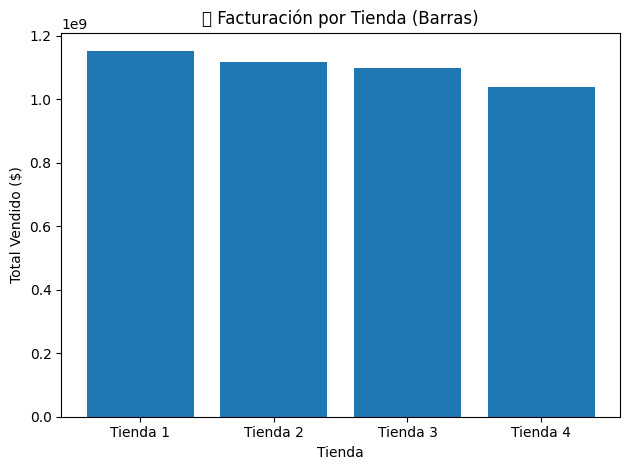

/tmp/ipython-input-1535700090.py:62: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


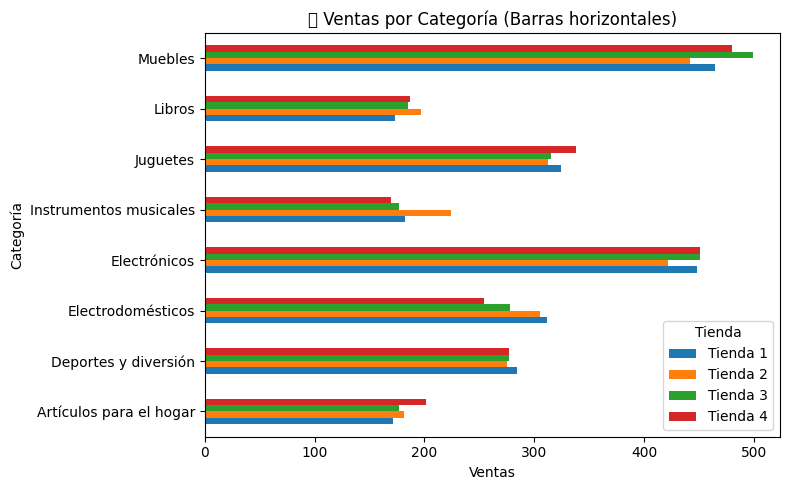

/tmp/ipython-input-1535700090.py:73: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


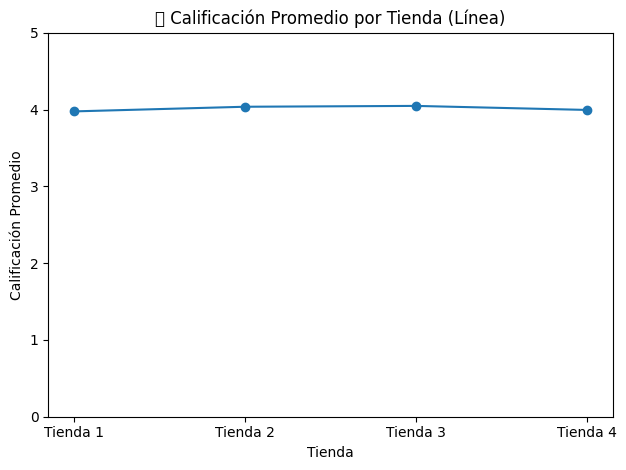

/tmp/ipython-input-1535700090.py:82: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


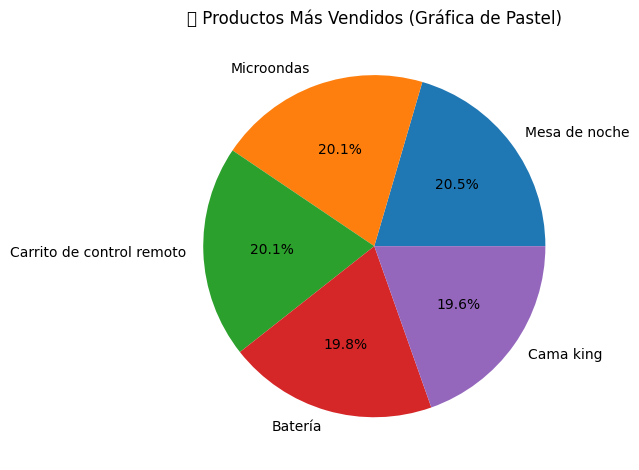

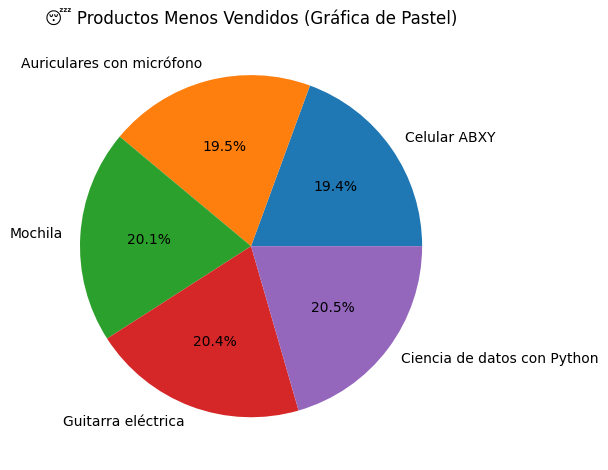

/tmp/ipython-input-1535700090.py:103: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


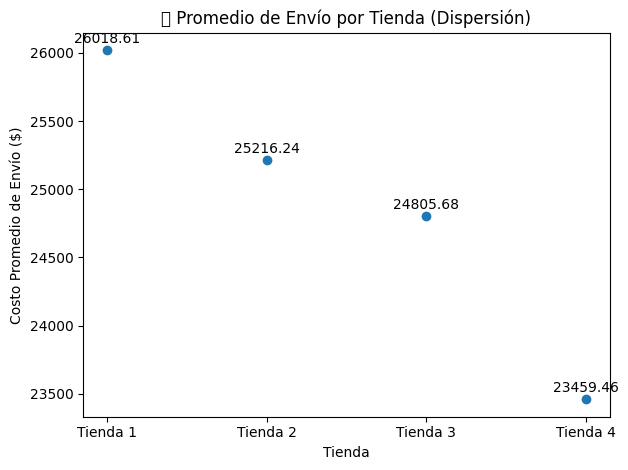

/tmp/ipython-input-1535700090.py:116: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


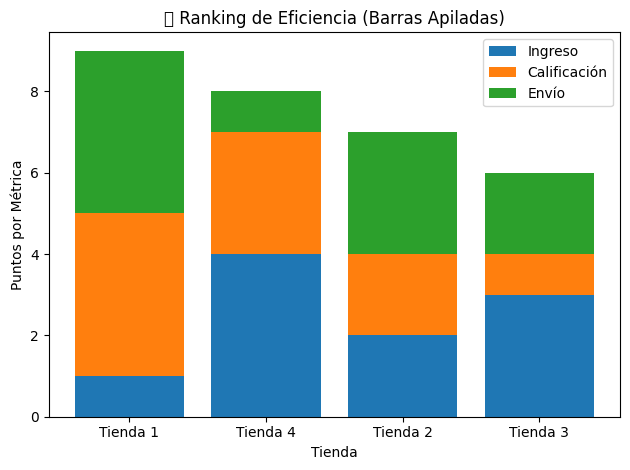

⚖️ Ranking (más puntos = peor):
     Tienda  Puntos_Malos  R_ing  R_cal  R_env
0  Tienda 1             9      1      4      4
1  Tienda 4             8      4      3      1
2  Tienda 2             7      2      2      3
3  Tienda 3             6      3      1      2
🚨 Recomendación: vender Tienda 1


In [16]:

import matplotlib.pyplot as plt

# Verificación mínima
required_cols = {"Precio","Calificación","Categoría del Producto","Producto","Costo de envío","Tienda"}
faltan = required_cols - set(todo.columns)
if faltan:
    raise ValueError(f"Faltan columnas en 'todo': {faltan}")

# ----- Agregados necesarios -----
# 1️⃣ Facturación
ingresos = (todo.groupby("Tienda", as_index=False)["Precio"]
              .sum()
              .rename(columns={"Precio":"Ingresos"}))

# 2️⃣ Ventas por categoría
categorias = (todo.groupby(["Tienda","Categoría del Producto"], as_index=False)
                .size()
                .rename(columns={"size":"Ventas"}))
pivot_cat = categorias.pivot(index="Tienda", columns="Categoría del Producto", values="Ventas").fillna(0)

# 3️⃣ Calificación promedio
calificacion = (todo.groupby("Tienda", as_index=False)["Calificación"]
                  .mean()
                  .rename(columns={"Calificación":"CalifProm"}))

# 4️⃣ Productos más y menos vendidos
productos = (todo.groupby("Producto", as_index=False)
               .size()
               .rename(columns={"size":"Ventas"}))
top5_productos = productos.sort_values("Ventas", ascending=False).head(5)
bottom5_productos = productos.sort_values("Ventas", ascending=True).head(5)

# 5️⃣ Envío promedio
envio = (todo.groupby("Tienda", as_index=False)["Costo de envío"]
           .mean()
           .rename(columns={"Costo de envío":"EnvioProm"}))

# 6️⃣ Resumen para ranking
resumen = ingresos.merge(calificacion, on="Tienda").merge(envio, on="Tienda")
resumen["R_ing"] = resumen["Ingresos"].rank(ascending=False).astype(int)
resumen["R_cal"] = resumen["CalifProm"].rank(ascending=False).astype(int)
resumen["R_env"] = resumen["EnvioProm"].rank(ascending=True).astype(int)
resumen["Puntos_Malos"] = resumen["R_ing"] + resumen["R_cal"] + resumen["R_env"]
ranking = resumen.sort_values("Puntos_Malos", ascending=False).reset_index(drop=True)

# -----------------------------
# 6.1 📊 Gráfica: Facturación (barras verticales)
# -----------------------------
plt.figure()
plt.bar(ingresos["Tienda"], ingresos["Ingresos"])
plt.title("💰 Facturación por Tienda (Barras)")
plt.xlabel("Tienda"); plt.ylabel("Total Vendido ($)")
plt.tight_layout()
plt.show()

# -----------------------------
# 6.2 🏷️ Gráfica: Ventas por Categoría (barras horizontales)
# -----------------------------
pivot_cat.T.plot(kind="barh", figsize=(8,5))
plt.title("🏷️ Ventas por Categoría (Barras horizontales)")
plt.xlabel("Ventas"); plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

# -----------------------------
# 6.3 ⭐ Gráfica: Calificación promedio (líneas)
# -----------------------------
plt.figure()
plt.plot(calificacion["Tienda"], calificacion["CalifProm"], marker="o")
plt.title("⭐ Calificación Promedio por Tienda (Línea)")
plt.xlabel("Tienda"); plt.ylabel("Calificación Promedio")
plt.ylim(0,5)
plt.tight_layout()
plt.show()

# -----------------------------
# 6.4 🏆 Gráfica: Productos más vendidos (pastel)
# -----------------------------
plt.figure()
plt.pie(top5_productos["Ventas"], labels=top5_productos["Producto"], autopct="%1.1f%%")
plt.title("🏆 Productos Más Vendidos (Gráfica de Pastel)")
plt.tight_layout()
plt.show()

# -----------------------------
# 6.5 😴 Gráfica: Productos menos vendidos (pastel)
# -----------------------------
plt.figure()
plt.pie(bottom5_productos["Ventas"], labels=bottom5_productos["Producto"], autopct="%1.1f%%")
plt.title("😴 Productos Menos Vendidos (Gráfica de Pastel)")
plt.tight_layout()
plt.show()

# -----------------------------
# 6.6 🚚 Gráfica: Promedio de Envío por Tienda (dispersión)
# -----------------------------
plt.figure()
plt.scatter(envio["Tienda"], envio["EnvioProm"])
plt.title("🚚 Promedio de Envío por Tienda (Dispersión)")
plt.xlabel("Tienda"); plt.ylabel("Costo Promedio de Envío ($)")
for i, txt in enumerate(envio["EnvioProm"]):
    plt.annotate(round(txt,2), (envio["Tienda"][i], envio["EnvioProm"][i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.tight_layout()
plt.show()

# -----------------------------
# 6.7 🎯 Gráfica: Recomendaciones (barras apiladas)
# -----------------------------
plt.figure()
plt.bar(ranking["Tienda"], ranking["R_ing"], label="Ingreso")
plt.bar(ranking["Tienda"], ranking["R_cal"], bottom=ranking["R_ing"], label="Calificación")
plt.bar(ranking["Tienda"], ranking["R_env"], bottom=ranking["R_ing"]+ranking["R_cal"], label="Envío")
plt.title("🎯 Ranking de Eficiencia (Barras Apiladas)")
plt.xlabel("Tienda"); plt.ylabel("Puntos por Métrica")
plt.legend()
plt.tight_layout()
plt.show()

print("⚖️ Ranking (más puntos = peor):")
print(ranking[["Tienda","Puntos_Malos","R_ing","R_cal","R_env"]])
print(f"🚨 Recomendación: vender {ranking.loc[0, 'Tienda']}")


# 7.  Recomendaciones

Combinamos toda la información y decidimos cuál tienda es la menos eficiente.

In [13]:
# 🔗 Unimos todas las métricas
resumen = ingresos.merge(calificacion, on="Tienda").merge(envio, on="Tienda")

# 🎯 Asignamos puntos "malos"
resumen["R_ing"] = resumen["Precio"].rank(ascending=False)   # 💰 más dinero = mejor
resumen["R_cal"] = resumen["Calificación"].rank(ascending=False)  # ⭐ más estrellas = mejor
resumen["R_env"] = resumen["Costo de envío"].rank(ascending=True)  # 🚚 menos costo = mejor

# ⚖️ Sumamos puntos malos
resumen["Puntos_Malos"] = resumen["R_ing"] + resumen["R_cal"] + resumen["R_env"]

# 🏁 Ordenamos de peor a mejor
ranking = resumen.sort_values("Puntos_Malos", ascending=False)
tienda_perdedora = ranking.iloc[0]["Tienda"]

print(f"🚨 La tienda menos eficiente es: {tienda_perdedora}")
print("👉 El Sr. Juan debería vender esta tienda 💼")


🚨 La tienda menos eficiente es: Tienda 1
👉 El Sr. Juan debería vender esta tienda 💼


Hicimos una competencia entre tiendas.
Sumamos puntos por tener pocos ingresos, baja calificación o envío caro.
La que saca más puntos “malos” es la perdedora.
👉 Y esa es la que el Sr. Juan debería vender.